# 🌦 Real World Data Visualization  
## Climate Analysis of Colombia (1824–2013)

**Course:** Algorithm Analysis & Data  
**Authors:** Jeisson Sanchez & Sebastian Albarracin 

**Dataset:** Berkeley Earth – Global Land Temperatures  
**Country analyzed:** Colombia  

---

### 🎯 Objective

Analyze historical temperature data for Colombia to identify long-term trends, seasonal patterns, and structural changes in climate behavior.

## 📊 Dataset Description

The dataset contains historical temperature records from 1824 to 2013.

Columns:
- `dt`: Date of record
- `AverageTemperature`: Monthly average temperature (°C)
- `AverageTemperatureUncertainty`: Measurement uncertainty
- `Country`: Country name

We filter the dataset to analyze Colombia only.

In [32]:
pip install pandas numpy matplotlib seaborn scikit-learn plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 🧹 Data Cleaning & Preparation

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("talk") 


df = pd.read_csv("../data/GlobalLandTemperaturesByCountry.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [34]:
df_col = df[df["Country"] == "Colombia"].copy()

df_col.shape

df_col["dt"] = pd.to_datetime(df_col["dt"])

df_col.info()

df_col["Year"] = df_col["dt"].dt.year
df_col["Month"] = df_col["dt"].dt.month

df_col.head()


df_col.describe()



<class 'pandas.DataFrame'>
RangeIndex: 2277 entries, 114732 to 117008
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2277 non-null   datetime64[us]
 1   AverageTemperature             2077 non-null   float64       
 2   AverageTemperatureUncertainty  2077 non-null   float64       
 3   Country                        2277 non-null   str           
dtypes: datetime64[us](1), float64(2), str(1)
memory usage: 71.3 KB


,dt,AverageTemperature,AverageTemperatureUncertainty,Year,Month
count,2277,2077.000000,2077.000000,2277.000000,2277.000000
mean,1918-10-31 22:55:29.644269,24.716871,0.581472,1918.375494,6.494071
min,1824-01-01 00:00:00,22.918000,0.076000,1824.000000,1.000000
25%,1871-06-01 00:00:00,24.279000,0.268000,1871.000000,3.000000
50%,1918-11-01 00:00:00,24.692000,0.433000,1918.000000,6.000000
75%,1966-04-01 00:00:00,25.114000,0.840000,1966.000000,9.000000
max,2013-09-01 00:00:00,27.205000,3.363000,2013.000000,12.000000
std,NaN,0.629906,0.397597,54.788232,3.451087


In [35]:
df_col = df_col.dropna(subset=["AverageTemperature"])
df_col.shape


(2077, 6)

## 📈 Long-Term Temperature Trend

To understand long-term climate behavior, we compute the yearly average temperature and visualize its evolution over time.

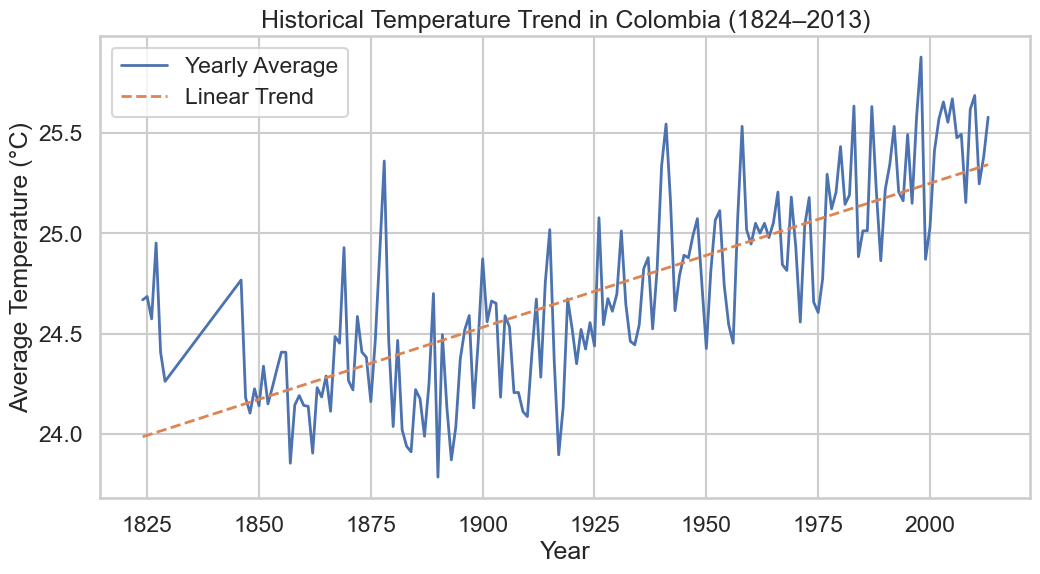

In [43]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=temp_year,
    x="Year",
    y="AverageTemperature",
    label="Yearly Average",
    linewidth=2
)

plt.plot(
    temp_year["Year"],
    p(temp_year["Year"]),
    linestyle="--",
    label="Linear Trend",
    linewidth=2
)

plt.title("Historical Temperature Trend in Colombia (1824–2013)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()

### 🔎 Observations

- Clear upward trend after 1970.
- Stronger acceleration after 1990.
- Evidence consistent with global warming patterns.

## 🔥 Monthly Heatmap (Seasonality + Warming)

This heatmap shows monthly average temperature over time.
It allows us to observe both seasonal patterns and structural warming.

In [37]:
pivot_temp = df_col.pivot_table(
    values="AverageTemperature",
    index="Month",
    columns="Year",
    aggfunc="mean"
)

pivot_temp.head()


Year,1824,1825,1826,1827,1828,1829,1846,1847,1848,1849,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month,,,,,,,,,,,,,,,,,,,,,
1,25.010,25.583,NaN,26.168,23.381,24.676,25.977,25.184,23.299,24.937,...,25.820,25.737,25.223,26.087,25.230,25.120,26.465,25.421,25.143,25.695
2,24.709,25.162,23.760,25.775,23.988,24.065,25.614,25.280,25.650,24.923,...,26.390,25.994,25.963,26.757,25.433,25.393,27.045,25.326,25.453,25.493
3,25.060,25.309,24.843,25.874,25.288,24.859,26.131,23.852,24.474,25.371,...,26.556,26.606,25.621,26.038,25.634,25.203,26.804,25.108,25.510,26.038
4,24.688,25.533,24.690,25.664,24.755,24.258,23.857,24.139,24.281,23.467,...,25.476,25.894,25.355,25.470,25.403,25.470,25.869,25.120,24.977,25.874
5,24.284,24.316,25.104,25.028,24.555,24.752,24.321,23.593,23.613,23.467,...,25.245,25.640,25.106,25.277,24.919,25.415,25.938,25.121,25.334,25.370


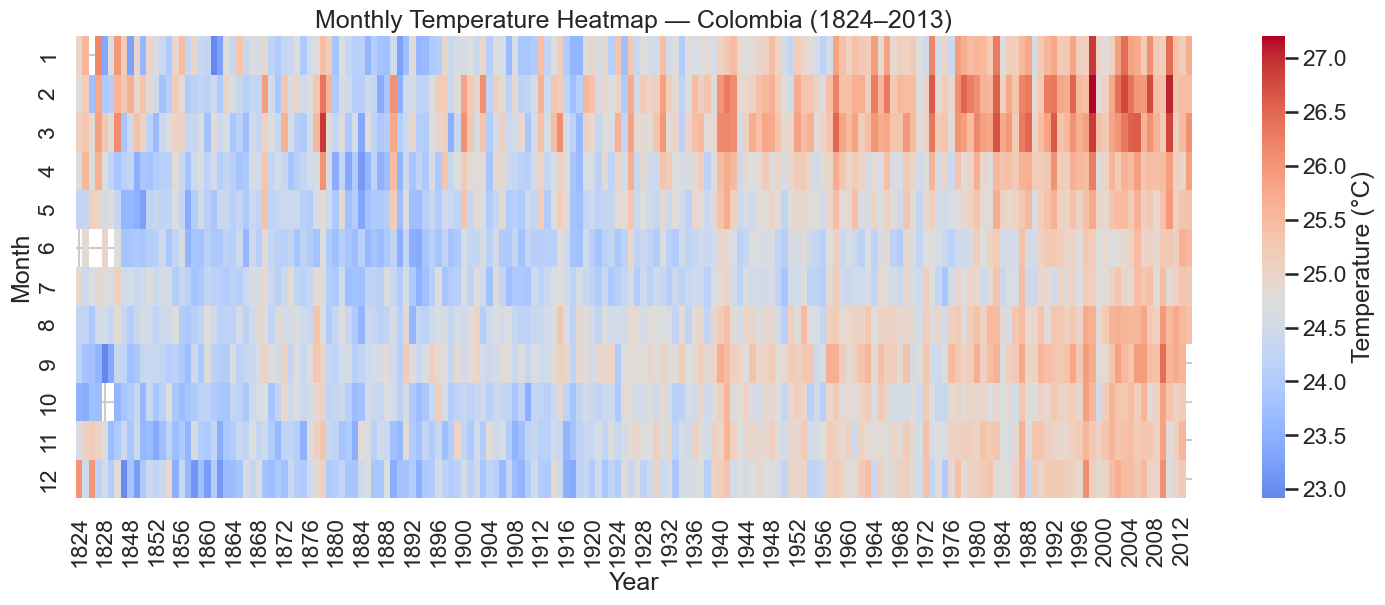

In [38]:
plt.figure(figsize=(18,6))

sns.heatmap(
    pivot_temp,
    cmap="coolwarm",
    center=pivot_temp.mean().mean(),
    cbar_kws={"label": "Temperature (°C)"}
)

plt.title("Monthly Temperature Heatmap — Colombia (1824–2013)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

### 🔎 Observations

- Consistent seasonal cycles.
- Gradual shift toward warmer tones after 1980.
- Warming affects most months of the year.

## 📊 Distribution by Decade

To evaluate structural change in temperature distribution, we group data by decade.

In [39]:
df_col["Decade"] = (df_col["Year"] // 10) * 10
df_col.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Decade
114732,1824-01-01,25.010,0.888,Colombia,1824,1,1820
114733,1824-02-01,24.709,1.802,Colombia,1824,2,1820
114734,1824-03-01,25.060,1.100,Colombia,1824,3,1820
114735,1824-04-01,24.688,1.592,Colombia,1824,4,1820
114736,1824-05-01,24.284,1.177,Colombia,1824,5,1820


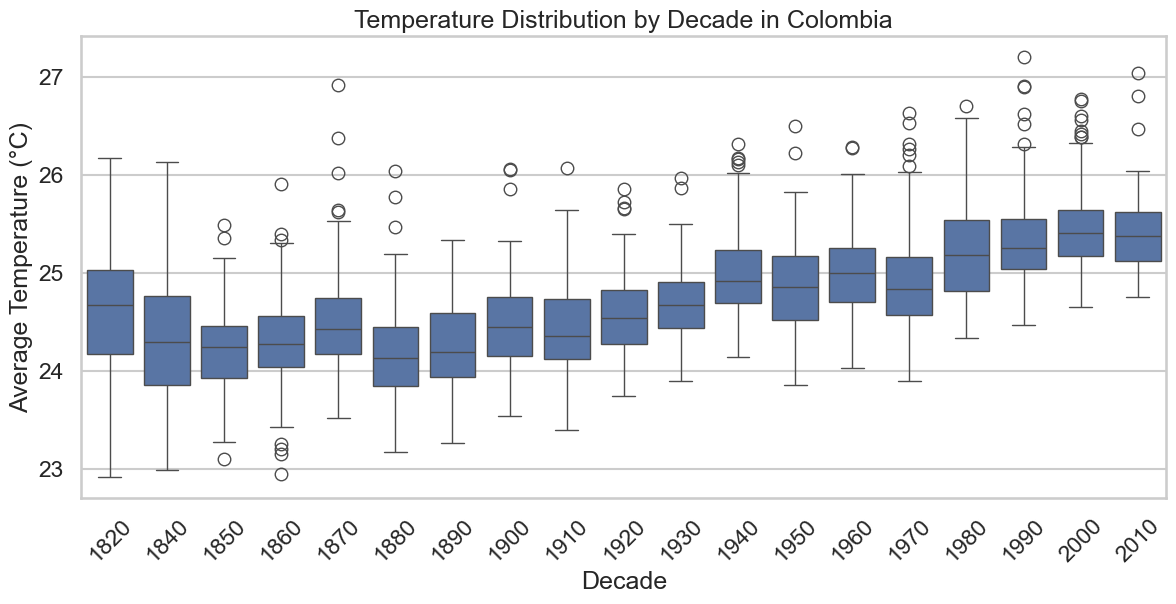

In [41]:
plt.figure(figsize=(14,6))

sns.boxplot(
    data=df_col,
    x="Decade",
    y="AverageTemperature"
)

plt.xticks(rotation=45)
plt.title("Temperature Distribution by Decade in Colombia")
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°C)")
plt.show()

### 🔎 Observations

- Median temperature increases steadily across decades.
- Entire distribution shifts upward.
- Recent decades show higher temperature outliers.

## 🌍 Comparative Climate Analysis: Colombia vs Global Trends

To better understand Colombia’s climate evolution, we compare its historical temperature trend with the global average derived from the same dataset.

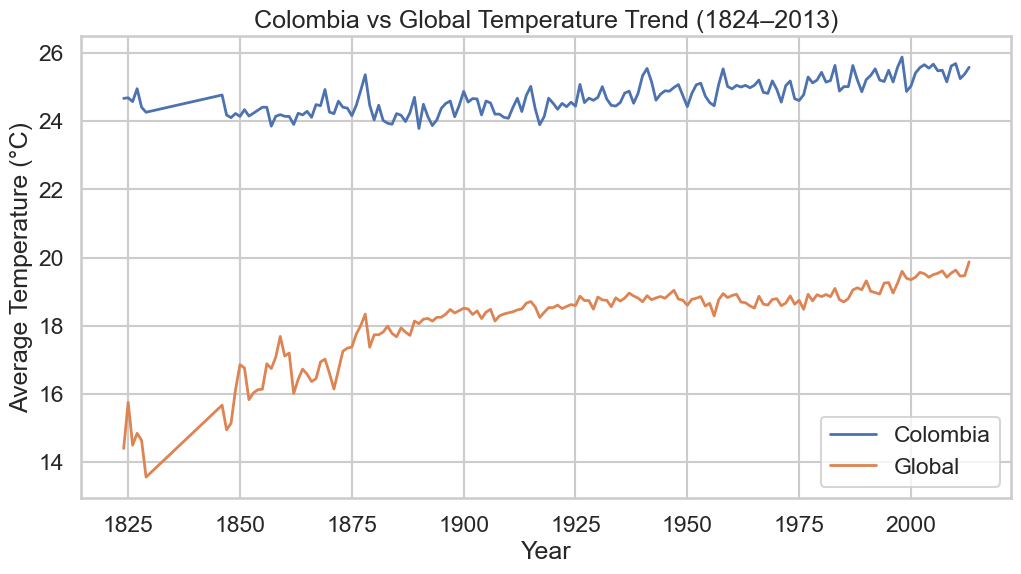

In [47]:
df_global = df.dropna(subset=["AverageTemperature"]).copy()

df_global["dt"] = pd.to_datetime(df_global["dt"])
df_global["Year"] = df_global["dt"].dt.year

global_year = df_global.groupby("Year")["AverageTemperature"].mean().reset_index()

global_year.head()

comparison = temp_year.merge(
    global_year,
    on="Year",
    suffixes=("_Colombia", "_Global")
)

comparison.head()

plt.figure(figsize=(12,6))

sns.lineplot(
    data=comparison,
    x="Year",
    y="AverageTemperature_Colombia",
    label="Colombia",
    linewidth=2
)

sns.lineplot(
    data=comparison,
    x="Year",
    y="AverageTemperature_Global",
    label="Global",
    linewidth=2
)

plt.title("Colombia vs Global Temperature Trend (1824–2013)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()


## 🌍 Colombia vs Global Comparison

The comparison between Colombia and global temperature trends shows that both follow a similar long-term warming trajectory.

However, differences in slope indicate that the regional warming intensity may differ from the global average.

This highlights the importance of analyzing climate change at both global and national scales.

# 🧠 Final Conclusions

This analysis demonstrates a clear long-term warming trend in Colombia between 1824 and 2013.

The increase is not limited to isolated years but reflects a structural shift in the overall temperature distribution.

The combination of:
- Long-term trend analysis,
- Seasonal heatmap,
- Decadal distribution study,

provides strong evidence of sustained climate change effects at the national level.